In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import exposure
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt


# Load MNIST dataset using scikit-learn
# SHOULD BE 28x28
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
def compute_hog_features(image):
    # features, hog_image = hog(image, orientations=8, pixels_per_cell=(2,2), cells_per_block=(1,1), visualize=True)
    feature_descriptor, hog_image = hog(image, orientations=8, pixels_per_cell=(4,4), cells_per_block=(1,1), visualize=True)
    rescaled = exposure.rescale_intensity(hog_image, in_range=(0,64))
    return feature_descriptor, rescaled
    # return rescaled

In [3]:

# Extract features (images) and labels
images, labels = mnist.data, mnist.target.astype(np.uint8)

# Split data to train(80%) and test
train_images, test_images, train_labels, test_labels = train_test_split(np.array(images), np.array(labels), test_size=0.2, random_state=42)
train_images, test_images, train_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.2, random_state=42)

### Another method using tensorflow
# from tensorflow.keras import datasets
# (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Display number of samples for train and test
print(len(train_images), len(test_images))


11200 2800


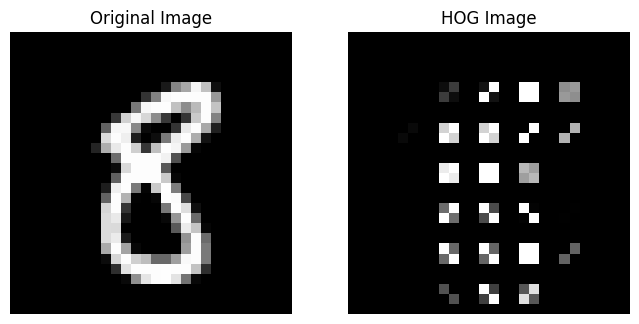

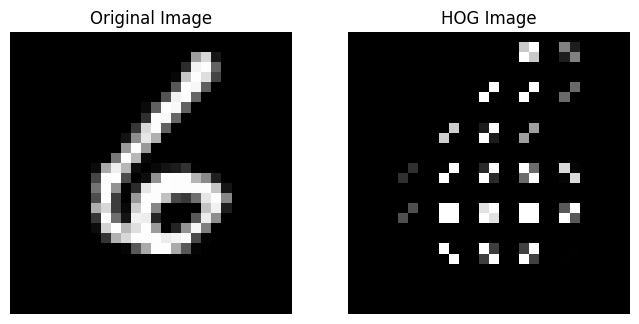

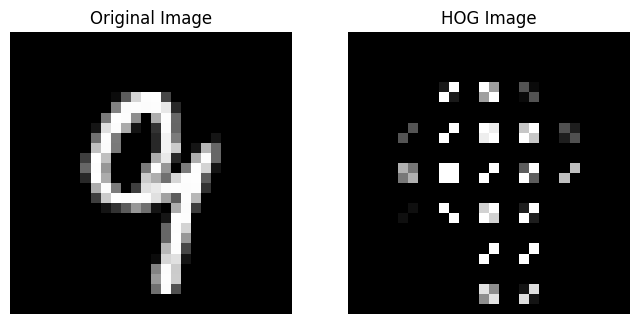

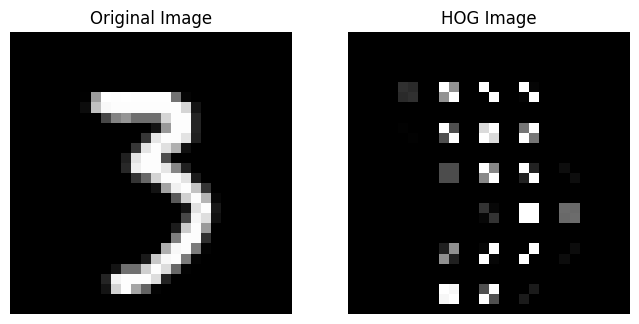

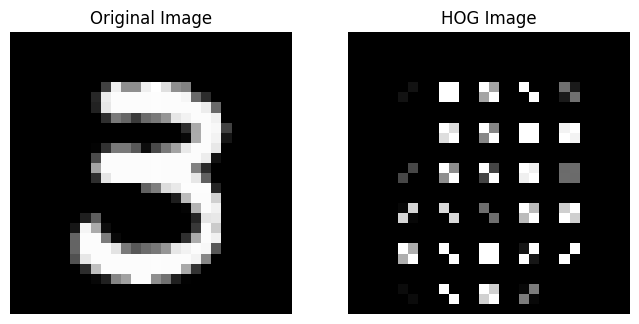

In [4]:
# Take the first 5 images for example and print them before and after HOG
for i in range(5):
    # Take example image as current i index
    example_image = train_images[i].reshape(28,28)

    # Compute HOG features for the example image
    ft, hog_example_image = compute_hog_features(example_image)

    # Plot the original and HOG images side by side
    plt.figure(figsize=(8, 4))

    # # Plot Original image
    plt.subplot(1, 2, 1)
    plt.imshow(example_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot hog version of image
    plt.subplot(1, 2, 2)
    plt.imshow(hog_example_image, cmap='gray')
    plt.title('HOG Image')
    plt.axis('off')

    plt.show()

In [5]:
# TAKES TOO LONG(7 minutes on colab), PLEASE RUN ON COLAB
# Run the HOG feature extraction function on the data set
hog_X_train_descriptors, hog_X_train_images = zip(*[compute_hog_features(image.reshape(28, 28)) for image in train_images])
hog_X_train_images = np.array(hog_X_train_images)
hog_X_train_descriptors = np.array(hog_X_train_descriptors)

hog_X_test_descriptors, hog_X_test_images = zip(*[compute_hog_features(image.reshape(28, 28)) for image in test_images])
hog_X_test_images = np.array(hog_X_test_images)
hog_X_test_descriptors = np.array(hog_X_test_descriptors)

# Print length of both the training and test sets
print(len(hog_X_train_images), len(hog_X_test_images))

11200 2800


In [6]:
# from SVM import SVM
# from sklearn.metrics import accuracy_score
# svm = SVM()
# hog_X_train_images = hog_X_train_images.reshape(11200, 784)
# hog_X_test_images = hog_X_test_images.reshape(2800, 784)

# svm.fit(hog_X_train_images, train_labels)

# accuracy_score(svm.predict(hog_X_test_images), test_labels)

In [7]:
import sklearn.svm
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the sklearn.svm.OneVsOneClassifier class.
classifier = OneVsOneClassifier(estimator=sklearn.svm.LinearSVC())
hog_X_train_images = hog_X_train_images.reshape((11200, -1))
hog_X_test_images = hog_X_test_images.reshape((2800, -1))
# Fit the classifier to the training data.
classifier.fit(hog_X_train_images, train_labels)

# Make predictions on the test data.
y_pred = classifier.predict(hog_X_test_images)

# Evaluate the model.
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Accuracy: 0.9317857142857143


In [8]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)

# Fit the model
knn.fit(hog_X_train_descriptors, train_labels)

# Make predictions in the test dataset
predictions = knn.predict(hog_X_test_descriptors)

# Print accuracy
acc = accuracy_score(test_labels , predictions)
print("Accuracy: ", acc)

Accuracy:  0.9528571428571428


## Logistic Regression

In [44]:
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [45]:
# training on default settings/hyper parameters
logistic_classifier = LogisticRegression()
logistic_classifier.fit(hog_X_train_descriptors, train_labels)
logistic_y_pred = logistic_classifier.predict(hog_X_test_descriptors)

default_accuracy = accuracy_score(test_labels, logistic_y_pred)
default_f1 = f1_score(test_labels, logistic_y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
print(f'Accuracy on default Settings: {default_accuracy}')
print(f'F1-score on default Settings: {default_f1}')

Accuracy on default Settings: 0.9632142857142857
F1-score on default Settings: 0.9631310812364445


# Training on Some of the possible hyper parameters Logistic Regression

Possible Solvers/Optimizers are [‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’]

but we will only use newton-cholesky, sag, saga, lbfgs
since we have a multiclass classification

and for C parameter this is the inverse of lamda in regularization
it controls how strict our regularization is

as C gets shrinks the regularization effect gets smaller and vice versa.
for really small C values:
the regularization is almost not there, it is more in danger to suffer from ovefitting

sometimes reasonable small C values affect the model nicely

In [141]:
# ‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’
# newton-cg, sag, saga, lbfgs
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']

# For me: None is deprecated
# penalties = ['l2']

# C controls how strict regularization is (lamda inverse) 1 / 2C
lambdas = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]

# fit_intercept adds bias or not
# fit_intercept = [True, False]


# grid = dict(solver=solvers,penalty=penalties,C=C, fit_intercept=fit_intercept)
# grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(hog_X_train_descriptors, train_labels)

# grid_result.best_params_

In [60]:
# store a record for each possibility (accuracy, optimizer, Cvalue)
params = []

# to store best params that gets highest accurcay
best_accuracy: int = 0
best_solver: str = ''
best_lamda_inverse: int = 0

# try all possibilities
for solver in solvers:
    for lam in lambdas:
        logistic_classifier = LogisticRegression(solver=solver, C=lam)
        logistic_classifier.fit(hog_X_train_descriptors, train_labels)
        y_pred = logistic_classifier.predict(hog_X_test_descriptors)

        curr_accuracy = accuracy_score(test_labels, y_pred)
        curr_f1 = f1_score(test_labels, y_pred, average='weighted')
        if curr_accuracy > best_accuracy:
            best_accuracy = curr_accuracy
            best_solver = solver
            best_lamda_inverse = lam

        params.append([curr_accuracy, solver, lam, curr_f1])

print(params)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[[0.9478571428571428, 'newton-cg', 10000, 0.9476849839449795], [0.9492857142857143, 'newton-cg', 1000, 0.9491123206293881], [0.9539285714285715, 'newton-cg', 100, 0.953825076146969], [0.9575, 'newton-cg', 10, 0.9574081173714002], [0.9632142857142857, 'newton-cg', 1, 0.9631313269935231], [0.9589285714285715, 'newton-cg', 0.1, 0.9588847746866166], [0.95, 'newton-cg', 0.01, 0.9499443153610833], [0.9228571428571428, 'newton-cg', 0.001, 0.9226780392457662], [0.955, 'sag', 10000, 0.9548908147799156], [0.9542857142857143, 'sag', 1000, 0.9541835710151565], [0.9535714285714286, 'sag', 100, 0.9534674130688692], [0.9571428571428572, 'sag', 10, 0.957037623674579], [0.9628571428571429, 'sag', 1, 0.9627695284702976], [0.9589285714285715, 'sag', 0.1, 0.9588847746866166], [0.95, 'sag', 0.01, 0.9499443153610833], [0.9228571428571428, 'sag', 0.001, 0.9226780392457662], [0.9567857142857142, 'saga', 10000, 0.9566691393196612], [0.9575, 'saga', 1000, 0.9573990811865533], [0.9571428571428572, 'saga', 100, 0

In [63]:
import pickle

params = np.array(params)
for i in range(len(params[:, 0])):
    params[i, 0] = np.round(float(params[i, 0]), 3)
    params[i, 3] = np.round(float(params[i, 3]), 3)


with open('logistic_params_history.pkl', 'wb') as logistic_hist:
    pickle.dump(params, logistic_hist)

[['0.948' 'newton-cg' '10000' '0.948']
 ['0.949' 'newton-cg' '1000' '0.949']
 ['0.954' 'newton-cg' '100' '0.954']
 ['0.958' 'newton-cg' '10' '0.957']
 ['0.963' 'newton-cg' '1' '0.963']
 ['0.959' 'newton-cg' '0.1' '0.959']
 ['0.95' 'newton-cg' '0.01' '0.95']
 ['0.923' 'newton-cg' '0.001' '0.923']
 ['0.955' 'sag' '10000' '0.955']
 ['0.954' 'sag' '1000' '0.954']
 ['0.954' 'sag' '100' '0.953']
 ['0.957' 'sag' '10' '0.957']
 ['0.963' 'sag' '1' '0.963']
 ['0.959' 'sag' '0.1' '0.959']
 ['0.95' 'sag' '0.01' '0.95']
 ['0.923' 'sag' '0.001' '0.923']
 ['0.957' 'saga' '10000' '0.957']
 ['0.958' 'saga' '1000' '0.957']
 ['0.957' 'saga' '100' '0.957']
 ['0.958' 'saga' '10' '0.958']
 ['0.962' 'saga' '1' '0.962']
 ['0.959' 'saga' '0.1' '0.959']
 ['0.95' 'saga' '0.01' '0.95']
 ['0.923' 'saga' '0.001' '0.923']
 ['0.952' 'lbfgs' '10000' '0.952']
 ['0.952' 'lbfgs' '1000' '0.952']
 ['0.951' 'lbfgs' '100' '0.951']
 ['0.956' 'lbfgs' '10' '0.956']
 ['0.963' 'lbfgs' '1' '0.963']
 ['0.959' 'lbfgs' '0.1' '0.959']

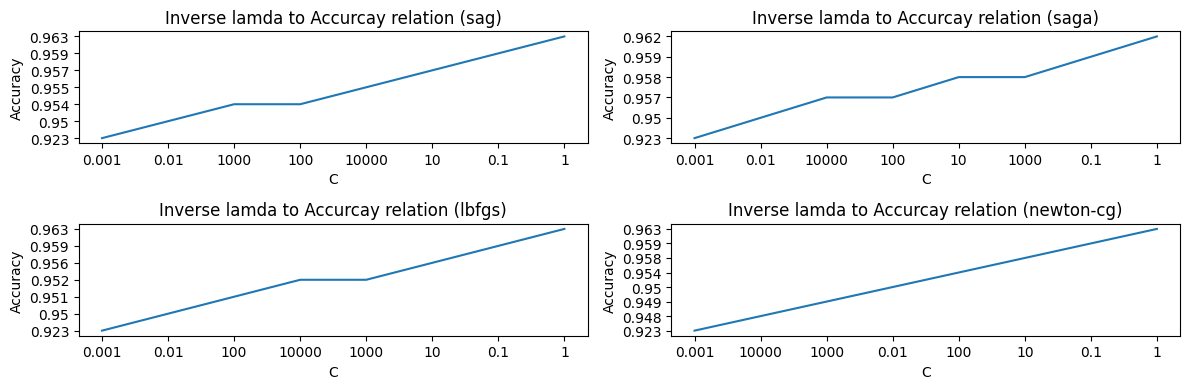

In [140]:
params = params[params[:, 0].argsort()]
sag = params[params[:, 1] == 'sag']
saga = params[params[:, 1] == 'saga']
lbfgs = params[params[:, 1] == 'lbfgs']
newton_cg = params[params[:, 1] == 'newton-cg']

# top left plot
plt.figure(figsize=(12, 4))
plt.subplot(2, 2, 1)
plt.plot(sag[:, 2], sag[:, 0])
# plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Inverse lamda to Accurcay relation (sag)')

# top right plot
plt.subplot(2, 2, 2)
plt.plot(saga[:, 2], saga[:, 0])
# plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Inverse lamda to Accurcay relation (saga)')

# bot left plot
plt.subplot(2, 2, 3)
plt.plot(lbfgs[:, 2], lbfgs[:, 0])
# plt.xscale('log')

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Inverse lamda to Accurcay relation (lbfgs)')

# bot right plot
plt.subplot(2, 2, 4)
plt.plot(newton_cg[:, 2], newton_cg[:, 0])
# plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Inverse lamda to Accurcay relation (newton-cg)')


plt.tight_layout()

plt.show()

From the Plots above we can conclude that:
Optimizers doesn't make much differences in our case
Inverse lamda(C) gives reasonable results from 0.1 to 10
and C=1 has the best performance
and also C=0.001 is the worst as explained above.